<a href="https://colab.research.google.com/github/prvpitawala/ML_project_1_simple/blob/main/git_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this code im going to make a simple model for get predicted numbers of y = mx + c

In [1]:
# import part
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# let's make the number set for ( y = 1x + 3 )
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [3]:
# let's make traing and test set
x_train_list , x_test_list = x[:14], x[14:]
y_train_list , y_test_list = y[:14], y[14:]


In [4]:
x_train_list, y_train_list

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

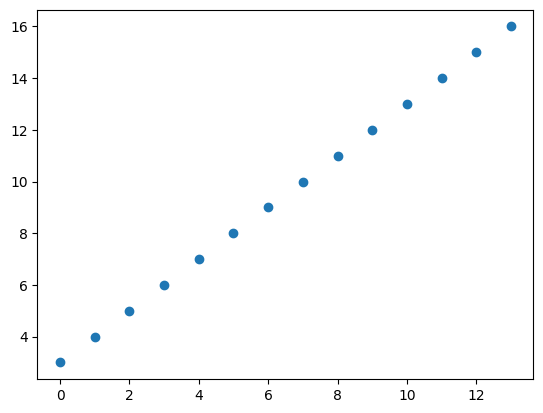

In [5]:
# lets plot our training data set
plt.scatter(x_train_list, y_train_list)

In [6]:
# make train and the test data set to the numpy array for feed our data to the model
x_train, x_test = np.array(x_train_list), np.array(x_test_list)
y_train, y_test = np.array(y_train_list), np.array(y_test_list)

In [7]:
x_train, y_train

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]))

In [8]:
# we want to increas  the array dimention for feed data to our dense layer,
x_train, x_test = np.expand_dims(x_train, axis = 1), np.expand_dims(x_test, axis = 1)
y_train, y_test = np.expand_dims(y_train, axis = 1), np.expand_dims(y_test, axis = 1)

In [9]:
# check train data set
x_train

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]])

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14, 1), (14, 1), (6, 1), (6, 1))

In [11]:
# now lets make our model
# set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu", input_shape=(14, 1)),
    tf.keras.layers.Dense(1, activation= "relu")
])

# complie the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["mse"])



In [12]:
# fix the model with train data
history = model.fit(x_train,
                    y_train,
                    epochs = 300,
                    )

Epoch 1/300
1/1 [==============================] - 1s 874ms/step - loss: 33.4100 - mse: 33.4100
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 33.1119 - mse: 33.1119
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 32.8148 - mse: 32.8148
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 32.5188 - mse: 32.5188
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 32.2238 - mse: 32.2238
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 31.9300 - mse: 31.9300
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 31.6374 - mse: 31.6374
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 31.3459 - mse: 31.3459
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 31.0555 - mse: 31.0555
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 30.7664 - mse: 30.7664
Epoch 11/300
1/1 [==============================] - 

In [20]:
y_pred  = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 23ms/step


array([[[18.03328 ]],

       [[19.27624 ]],

       [[20.519203]],

       [[21.762165]],

       [[23.005125]],

       [[24.248089]]], dtype=float32)

In [21]:
y_test

array([[17],
       [18],
       [19],
       [20],
       [21],
       [22]])

In [22]:
# evaluate the model
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 2.8640 - mse: 2.8640


[2.8640146255493164, 2.8640146255493164]

In [23]:
# lets plot the model predicted values in red colour
def plot_graph(x_1, y_1, x_2=None, y_2=None):
    # Plotting the training data
    plt.scatter(x_1, y_1, color='blue', label='Training Data')
    plt.scatter(x_2, y_2, color='red', label='Testing Data')
    # Adding labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Data Plot')

    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

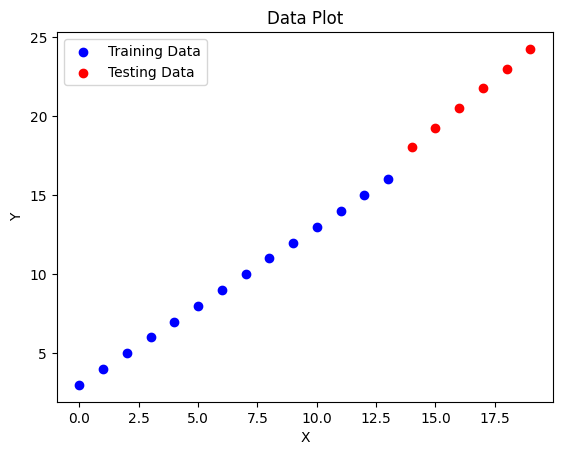

In [24]:
plot_graph(x_train, y_train, x_test, y_pred)

In [26]:
# look like our model not working well so lets run our model more epochs

# fix the model with train data
history = model.fit(x_train,
                    y_train,
                    epochs = 3000,
                    )

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 1.2098 - mse: 1.2098
Epoch 6/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.2087 - mse: 1.2087
Epoch 7/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.2076 - mse: 1.2076
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.2064 - mse: 1.2064
Epoch 9/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.2053 - mse: 1.2053
Epoch 10/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.2042 - mse: 1.2042
Epoch 11/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.2031 - mse: 1.2031
Epoch 12/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.2019 - mse: 1.2019
Epoch 13/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.2008 - mse: 1.2008
Epoch 14/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.1997 - mse: 1.1997
Epoch 15/3000
1/1 [====

In [27]:
# lets evaluate the model again
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 4.8292e-04 - mse: 4.8292e-04


[0.0004829180834349245, 0.0004829180834349245]

In [28]:
# looks like our erro is equal to zero that is performing well. let get the predicted values
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 32ms/step


array([[[17.014702]],

       [[18.017414]],

       [[19.020126]],

       [[20.022839]],

       [[21.025549]],

       [[22.028261]]], dtype=float32)

In [29]:
y_test

array([[17],
       [18],
       [19],
       [20],
       [21],
       [22]])

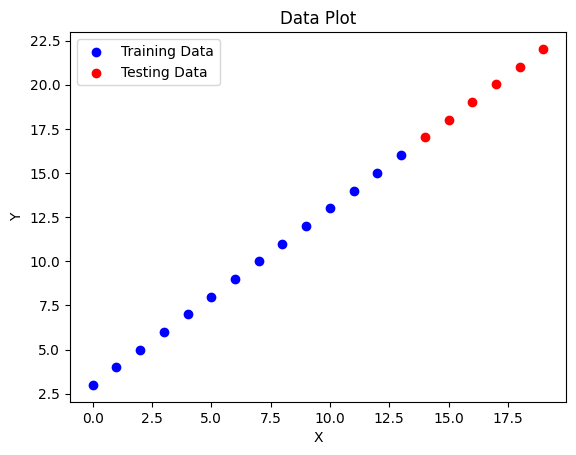

In [31]:
# ohhhh... our model is preforming well.. lets plot the graph with the trainig values and the predicted values
plot_graph(x_train, y_train, x_test, y_pred)

Wow... our model is nicely working...  

In [32]:
# lets try to predict for another numbers (100)
test_x_array = np.array([100]) # get predict for 100
test_x = np.expand_dims(test_x_array, axis = 1)

model.predict(test_x)

1/1 [==============================] - 0s 31ms/step


array([[[103.24793]]], dtype=float32)

In [34]:
# our equaton is

y = 1*100 + 3
print(y)

103


Super fine. model is working well... thank you..